<a href="https://colab.research.google.com/github/Mario-Corrente/paper_unibo/blob/main/Copia_di_1_Rinizio_progetto_Poggi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Progetto del corso - Laboratorio di Programmazione - a.a. 2023/2024

# Membri del gruppo numero-gruppo

Il gruppo numero-gruppo è composto da (modificare con i propri dati):

*   **Mario Corrente:** 1115946, e-mail: mario.corrente@studio.unibo.it
*   **Martina Orrù:** 1118772, e-mail martina.orru@studio.unibo.it


# Preparazione dell'ambiente

Per iniziare procediamo subito ad importare tutte le librerie necessarie di Python.

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm, tree
from sklearn.metrics import *

# FASE 1

## ABSTRACT

Nel presente progetto si procede ad esplorare e analizzare i dati presenti in un dataset, con l'obiettivo di creare un modello previsionale che sia in grado di predire un attacco cardiaco. \
Il dataset contiene varie informazioni come il genere del soggetto, l'età, se soffre di ipertensione, di malattie cardiache, i livelli medi di glucosio nel sangue e il BMI (Indice di massa corporea - Body Mass Index). \
***LA FASE 1*** È incentrata alla descrizione del dataset, fornendo al lettore le informazioni principali alle quali tener conto nel resto dell'analisi. Verranno esplorate quindi le statistiche principali del dataset, quali medie, mediane e deviazioni standard.\
***FASE 2*** È interamente dedicata all'analisi del dataset. È composta da una serie di grafici relazionali che mettono in evidenza le varie dipendenze delle variabili presenti nel dataset.\
Si portano all'attenzione del lettore tutte le relazioni necessarie per cercare di comprendere la dipendenza di alcune variabili da altre. \
***FASE 3*** Si concentrerà sulla parte di Machine Learning. Verranno preparati entrambi i dataset, train e test, per creare il modello di machine learning adatto per la previsione. \
Verranno esposti i risultati dei modelli e verranno messi a confronto per vedere quale dei due è più preciso e affidabile. \
***CONCLUSIONI*** Questa sezione riporterà le conclusioni alle quali siamo giunti dopo il lavoro e un report dettagliato su quanto emerso durante lo studio del dataset.


## INTRODUZIONE ALL'ANALISI

Nel presente progetto verranno esplorati i dati presenti nel dataset fornito. L'obiettivo principale del progetto è creare un modello previsionale in grado di predire la possibilità di infarto. \
Useremo gli strumenti messi a disposizione da Python per effettuare la ***data analysis***, come Pandas, Seaborn e per concludere i modelli previsionali di *Machine Learning*. \
Grazie al modello previsionale potremo esplorare i risultati del modello, la sua *accuracy*, la *precision e recall*, la *matrice di confusione*. \
Per concludere verrà presentato il report del seguente lavoro. \
Oggetto del presente elaborato è un dataset contenente varie informazioni su soggetti che risultano colpiti o meno da "stroke" (infarto).

### PREPARAZIONE DATASET


Carico i dataset per iniziare le prime analisi.

In [10]:
train_nc = pd.read_csv("sample_data/2.train_non_convertito.csv", sep = ",")
test_nc = pd.read_csv("sample_data/2.test_non_convertito.csv", sep = ",")
train_nc

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,44243,Female,29.0,0,0,No,Private,Rural,78.88,26.1,never smoked,0
1,6172,Female,79.0,0,0,Yes,Private,Rural,208.05,NaN,smokes,0
2,55680,Male,13.0,0,0,No,children,Urban,114.84,18.3,Unknown,0
3,24272,Male,63.0,0,0,Yes,Govt_job,Rural,217.66,28.7,formerly smoked,0
4,56584,Female,22.0,0,0,No,Private,Rural,62.00,32.7,smokes,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4074,12911,Female,51.0,0,0,Yes,Private,Rural,81.73,27.4,never smoked,0
4075,34965,Female,18.0,0,0,No,Private,Urban,95.87,23.0,never smoked,0
4076,37307,Female,35.0,0,0,Yes,Private,Urban,65.48,50.5,never smoked,0
4077,10552,Female,81.0,0,0,Yes,Self-employed,Rural,81.95,16.9,never smoked,1


In [11]:
print("La media dell'età dataset è : ", train_nc["age"].mean())
print("La mediana dell'età dataset è : ", train_nc["age"].median())
print("La deviazione standard dell'età nel dataset è : ", train_nc["age"].std())
print("La varianza dell'età nel dataset è : ", train_nc["age"].var())
print()
print("La media del livello medio di glucosio nel dataset è : ", train_nc["avg_glucose_level"].mean())
print("La mediana del livello medio di glucosio nel dataset è : ", train_nc["avg_glucose_level"].median())
print("La deviazione standard del livello medio di glucosio nel dataset è : ", train_nc["avg_glucose_level"].std())
print("La varianza del livello medio di glucosio nel dataset è : ", train_nc["avg_glucose_level"].var())
print()
print("La media del BMI dataset è : ", train_nc["bmi"].mean())
print("La mediana del BMI dataset è : ", train_nc["bmi"].median())
print("La deviazione standard del BMI nel dataset è : ", train_nc["bmi"].std())
print("La varianza del BMI nel dataset è : ", train_nc["avg_glucose_level"].var())
print()

La media dell'età dataset è :  43.29937729835744
La mediana dell'età dataset è :  45.0
La deviazione standard dell'età nel dataset è :  22.634031508964178
La varianza dell'età nel dataset è :  512.2993823487832

La media del livello medio di glucosio nel dataset è :  105.66351801912234
La mediana del livello medio di glucosio nel dataset è :  91.53
La deviazione standard del livello medio di glucosio nel dataset è :  45.04252762615051
La varianza del livello medio di glucosio nel dataset è :  2028.8292949525319

La media del BMI dataset è :  28.96394194041253
La mediana del BMI dataset è :  28.1
La deviazione standard del BMI nel dataset è :  7.862828620290778
La varianza del BMI nel dataset è :  2028.8292949525319



### ESPLORAZIONE DATASET


In [12]:
num_righe = train_nc.shape[0]
num_colonne = train_nc.shape[1]
print("Numero righe", num_righe)
print("Numero colonne", num_colonne)

Numero righe 4079
Numero colonne 12


Come vediamo da una prima analisi del dataset, la tabella è composta da 4079 righe per 12 colonne. Le righe rappresentano i soggetti interessati dallo studio, e le colonne rappresentano le variabili associate a questi soggetti. Le variabili riportate sono:

Abbiamo diversi valori categorici:
*   Il genere
*   Ipertensione
*   Malattie cardiache
*   Se sono mai stati sposati
*   Tipo di residenza
*   Attacco cardiaco

Mentre abbiamo altri valori non categorici:
*   Età
*   Livelli medi di glucosio nel sangue
*   BMI Indice di Massa Corporea



In [13]:
num_righe = test_nc.shape[0]
num_colonne = test_nc.shape[1]
print("Numero righe", num_righe)
print("Numero colonne", num_colonne)

Numero righe 1031
Numero colonne 12


Nel test nc invece abbiamo 1031 righe, ovviamente sempre distribuiti su 12 colonne.

In [14]:
print(train_nc.isnull().sum())

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  152
smoking_status         0
stroke                 0
dtype: int64


Facendo subito un'analisi sui dati presenti, notiamo che ci sono 152 soggetti con valore nullo per quanto riguarda la variabile di Indice di massa corporea, BMI.

In [15]:
print(test_nc.isnull().sum())

id                    0
gender                0
age                   0
hypertension          0
heart_disease         0
ever_married          0
work_type             0
Residence_type        0
avg_glucose_level     0
bmi                  49
smoking_status        0
stroke                0
dtype: int64


Nel test nc invece abbiamo solamente 49 valori nulli sulla colonna di bmi.

In [16]:
pd.set_option("display.float_format", lambda x: "{:.2f}".format(x))     #per impostare un massimo di 2 numeri decimali dopo la virgola. Per semplice chiarezza
print(train_nc.describe())
#test_nc.describe()
print(train_nc.info())

            id     age  hypertension  heart_disease  avg_glucose_level  \
count  4079.00 4079.00       4079.00        4079.00            4079.00   
mean  36609.62   43.30          0.10           0.05             105.66   
std   21076.16   22.63          0.30           0.23              45.04   
min      67.00    0.08          0.00           0.00              55.12   
25%   17950.50   25.00          0.00           0.00              76.88   
50%   37192.00   45.00          0.00           0.00              91.53   
75%   54511.50   61.00          0.00           0.00             113.65   
max   72940.00   82.00          1.00           1.00             271.74   

          bmi  stroke  
count 3927.00 4079.00  
mean    28.96    0.05  
std      7.86    0.21  
min     10.30    0.00  
25%     23.60    0.00  
50%     28.10    0.00  
75%     33.20    0.00  
max     97.60    1.00  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4079 entries, 0 to 4078
Data columns (total 12 columns):
 #   Colum

Dalla descrizione del Dataset possiamo iniziare ad ottenere le prime informazioni utili alla presentazione.
* Abbiamo una media età di circa 43 anni. Da un minimo di poco meno di un anno fino ad un massimo di 82 anni.
* La media dei livelli di glocosio nel sangue è di 105,66 (leggermente più alto del valore massimo accetabile per il livello di glucosio che dovrebbe attestarsi massimo a 100). Da un minimo di 55,12 fino al massimo di 271,74.
* Il valore medio di BMI è di 28,96. Da un minimo di 10,30 fino al massimo di 97.60. Ricordiamo che il valore BMI è un valore da prendere in considerazione con molta attenzione, dato che non è un valore che dimostra effettivamente se una persona potrebbe risultare obesa o meno.


In [17]:
genders = {"Male": 0, "Female": 1}
train_nc["gender"] = train_nc["gender"].map(genders)
test_nc["gender"] = test_nc["gender"].map(genders)

Per effettuare una comparazione tra stroke e gender ho dovuto necessariamente mappare come numerici i valori espressi in lettere.

In [18]:
print("Il raggruppamento per genere e stroke è: \n  0 = maschi e 1 = femmine \n", train_nc.groupby("gender")["stroke"].mean())
maschi = (train_nc["gender"] == 0).sum()
femmine = (train_nc["gender"] == 1).sum()
print("Il numero totale di maschi è: \n ", maschi)
print("Il numero totale di femmine è: \n",femmine)

Il raggruppamento per genere e stroke è: 
  0 = maschi e 1 = femmine 
 gender
0.00   0.05
1.00   0.04
Name: stroke, dtype: float64
Il numero totale di maschi è: 
  1696
Il numero totale di femmine è: 
 2382


Da questo approfondimento vediamo che la percentuale di "stroke" é:
* 5% per i soggetti di genere maschile.
* 4% per i soggetti di genere femminile.

Vediamo subito che la media di stroke per i maschi è leggermente più alta della media stroke per le femmine, tenendo anche conto del fatto che i maschi sono meno numerosi nel dataset, quindi il primo valore da prendere in considerazione è il sesso, essendo i maschi evidentemente più predisposti.

In [19]:
print("Il raggruppamento per genere e stroke è: \n  0 = maschi e 1 = femmine \n", test_nc.groupby("gender")["stroke"].mean())
maschitest = (test_nc["gender"] == 0).sum()
femminetest = (test_nc["gender"] == 1).sum()
print("Il numero totale di maschi è: \n ", maschitest)
print("Il numero totale di femmine è: \n",femminetest)

Il raggruppamento per genere e stroke è: 
  0 = maschi e 1 = femmine 
 gender
0   0.05
1   0.06
Name: stroke, dtype: float64
Il numero totale di maschi è: 
  419
Il numero totale di femmine è: 
 612


In [20]:
conteggio = (train_nc.groupby("gender").count())
media = (train_nc.groupby("gender")["bmi"].mean())

print("Il conteggio dei soggetti è: ")
print(conteggio)
print("La media dei valori è: ")
print(media)

Il conteggio dei soggetti è: 
          id   age  hypertension  heart_disease  ever_married  work_type  \
gender                                                                     
0.00    1696  1696          1696           1696          1696       1696   
1.00    2382  2382          2382           2382          2382       2382   

        Residence_type  avg_glucose_level   bmi  smoking_status  stroke  
gender                                                                   
0.00              1696               1696  1619            1696    1696  
1.00              2382               2382  2307            2382    2382  
La media dei valori è: 
gender
0.00   28.80
1.00   29.08
Name: bmi, dtype: float64


A questo punto procediamo a rimuovere le colonne che non riteniamo necessarie o importanti per l'analisi, come id, mai stato sposato, il tipo di lavoro (essendo troppo generico come dato per avere delle comparazioni) e il tipo di residenza, che a mio avviso non sono delle variabili discriminanti per l'analisi. Lasciamo tutti gli altri valori che crediamo siano utili per un'analisi di questo tipo.

In [21]:
mediana_bmi = train_nc["bmi"].median()
print("La mediana del valore bmi è : ", mediana_bmi)

La mediana del valore bmi è :  28.1


In [22]:
train_nc.drop(["id", "ever_married", "work_type", "Residence_type"], axis=1, inplace=True)

In [23]:
print("La descrizione del train non convertito è: ")
train_nc.describe()

La descrizione del train non convertito è: 


,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4078.00,4079.00,4079.00,4079.00,4079.00,3927.00,4079.00
mean,0.58,43.30,0.10,0.05,105.66,28.96,0.05
std,0.49,22.63,0.30,0.23,45.04,7.86,0.21
min,0.00,0.08,0.00,0.00,55.12,10.30,0.00
25%,0.00,25.00,0.00,0.00,76.88,23.60,0.00
50%,1.00,45.00,0.00,0.00,91.53,28.10,0.00
75%,1.00,61.00,0.00,0.00,113.65,33.20,0.00
max,1.00,82.00,1.00,1.00,271.74,97.60,1.00


In base a questi valori vediamo che:

* La media dell'età è di 43.3, da un valore minimo di meno di un anno fino ad un massimo di 82 anni del soggetto più anziano.
* La deviazione standard dell'età è di 22.63 significa che c'è una sensibile differenza nella distribuzione dell'età.

* La distribuzione dell'età è:
1.   Il 25% dei soggetti ha un'età inferiore ai 25 anni.
2.   Il 50% dei soggetti ha un'età inferiore ai 45 anni.
3.   Il 75% dei soggetti ha un'età inferiore ai 61 anni.

* Per quanto riguarda i livelli di glucosio abbiamo:

1.   Una media che si attesta a 105.66
2. Una deviazione standard di 45.04, indicando quindi una grossa differenza nella distribuzione dei valori.
3. Un valore massimo del livello medio di glucosio di 271.74, che è un dato altamente preoccupate, tenendo sempre in considerazione che il livello massimo ottimale sarebbe di 100.

* Analizzando invece il BMI vediamo che:
1. La media dei valori di BMI è di 28.96 (non si discosta molto dalla mediana)
2. una deviazione standard di 7.86 indica una cert omogeneità nei soggetti.
3. Il valore minimo che si attesta a 10.30
4. Il valore massimo che si attesta a 97.60



In [24]:
train_nc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4079 entries, 0 to 4078
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4078 non-null   float64
 1   age                4079 non-null   float64
 2   hypertension       4079 non-null   int64  
 3   heart_disease      4079 non-null   int64  
 4   avg_glucose_level  4079 non-null   float64
 5   bmi                3927 non-null   float64
 6   smoking_status     4079 non-null   object 
 7   stroke             4079 non-null   int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 255.1+ KB


In [ ]:
test_nc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1031 entries, 0 to 1030
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 1031 non-null   int64  
 1   gender             1031 non-null   int64  
 2   age                1031 non-null   float64
 3   hypertension       1031 non-null   int64  
 4   heart_disease      1031 non-null   int64  
 5   ever_married       1031 non-null   object 
 6   work_type          1031 non-null   object 
 7   Residence_type     1031 non-null   object 
 8   avg_glucose_level  1031 non-null   float64
 9   bmi                982 non-null    float64
 10  smoking_status     1031 non-null   object 
 11  stroke             1031 non-null   int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 96.8+ KB


In [6]:
percentuali_train = train_nc['stroke'].value_counts(normalize=True)
percentuali_test = test_nc['stroke'].value_counts(normalize=True)
print("Proporzioni di stroke nel training dataset:")
print(percentuali_train)
print("\nProporzioni di stroke nel test dataset:")
print(percentuali_test)

Proporzioni di stroke nel training dataset:
0    0.953665
1    0.046335
Name: stroke, dtype: float64

Proporzioni di stroke nel test dataset:
0    0.941804
1    0.058196
Name: stroke, dtype: float64


Come vediamo, nel dataset train abbiamo:
* 95% dei soggetti non colpiti da 'stroke'.
* 5% dei soggetti colpiti da 'stroke'

Nel dataset di test invece:
* 94% dei soggetti non colpiti da 'stroke'
* 6% dei soggetti colpiti da 'stroke'

Fatte le primissime analisi procediamo a sostituire i valori nulli che si trovano nella colonna bmi per avere un seto completo. I valori nulli verranno sostituiti con il valore della mediana per evitare di incorrere in problemi di valutazione della media, anche se, stando ai dati non sembrano esserci apparenti valori outlier che siano in grado di falsificare il valore della media.

### SOSTITUZIONE VALORI NULLI

In [ ]:
for nulli, valore_bmi in train_nc["bmi"].items():
  if pd.isnull(valore_bmi):
    train_nc.at[nulli, "bmi"] = mediana_bmi

In [ ]:
print(train_nc.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4079 entries, 0 to 4078
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4078 non-null   float64
 1   age                4079 non-null   float64
 2   hypertension       4079 non-null   int64  
 3   heart_disease      4079 non-null   int64  
 4   avg_glucose_level  4079 non-null   float64
 5   bmi                4079 non-null   float64
 6   smoking_status     4079 non-null   object 
 7   stroke             4079 non-null   int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 255.1+ KB
None


Ritrovandoci così con un dataset abbastanza chiaro e ripulito.

Adesso abbiamo un dataset completo e senza valori nulli. A questo punto possiamo iniziare a verificare le varie relazioni che ci sono tra le variabili nel dataset.

# FASE 2

### PREPARAZIONE VARIABILI RELAZIONALI

INIZIAMO A VALUTARE I FILE E CERCARE DELLE CORRELAZIONI TRA I VALORI PRESENTI.

In [ ]:
colonne_rel1 = train_nc[["gender", "avg_glucose_level", "age"]]
print(colonne_rel1.mean())
print(colonne_rel1.count())

gender                0.58
avg_glucose_level   105.66
age                  43.30
dtype: float64
gender               4078
avg_glucose_level    4079
age                  4079
dtype: int64


In [ ]:
colonne_relt = test_nc[["gender", "avg_glucose_level", "age"]]
colonne_relt

,gender,avg_glucose_level,age
0,1,99.36,47.00
1,1,108.80,32.00
2,1,91.90,43.00
3,1,77.29,20.00
4,1,103.78,44.00
...,...,...,...
1026,1,95.94,74.00
1027,1,109.81,4.00
1028,0,90.44,47.00
1029,1,88.11,0.88


In [ ]:
colonne_rel2 = test_nc[["gender", "avg_glucose_level", "age"]]
colonne_rel2

,gender,avg_glucose_level,age
0,1,99.36,47.00
1,1,108.80,32.00
2,1,91.90,43.00
3,1,77.29,20.00
4,1,103.78,44.00
...,...,...,...
1026,1,95.94,74.00
1027,1,109.81,4.00
1028,0,90.44,47.00
1029,1,88.11,0.88


In [ ]:
colonne_relt2 = train_nc[["gender", "avg_glucose_level", "age"]]
colonne_relt2

,gender,avg_glucose_level,age
0,1.00,78.88,29.00
1,1.00,208.05,79.00
2,0.00,114.84,13.00
3,0.00,217.66,63.00
4,1.00,62.00,22.00
...,...,...,...
4074,1.00,81.73,51.00
4075,1.00,95.87,18.00
4076,1.00,65.48,35.00
4077,1.00,81.95,81.00


Filtriamo, dunque, le colonne che ci interessano per valutare relazioni. Assegnamo delle nuove variabili per creare delle colonne relazionali.

In [ ]:
colonne_rel3 = train_nc[["bmi", "avg_glucose_level", "age", "hypertension", "stroke"]]
colonne_rel3

,bmi,avg_glucose_level,age,hypertension,stroke
0,26.10,78.88,29.00,0,0
1,28.10,208.05,79.00,0,0
2,18.30,114.84,13.00,0,0
3,28.70,217.66,63.00,0,0
4,32.70,62.00,22.00,0,0
...,...,...,...,...,...
4074,27.40,81.73,51.00,0,0
4075,23.00,95.87,18.00,0,0
4076,50.50,65.48,35.00,0,0
4077,16.90,81.95,81.00,0,1


In [ ]:
colonne_relt3 = test_nc[["bmi", "avg_glucose_level", "age", "hypertension", "stroke"]]
colonne_relt3

,bmi,avg_glucose_level,age,hypertension,stroke
0,23.80,99.36,47.00,0,0
1,24.00,108.80,32.00,0,0
2,32.70,91.90,43.00,0,0
3,28.40,77.29,20.00,0,0
4,49.80,103.78,44.00,0,0
...,...,...,...,...,...
1026,27.00,95.94,74.00,0,0
1027,17.90,109.81,4.00,0,0
1028,28.70,90.44,47.00,0,0
1029,15.50,88.11,0.88,0,0


In [ ]:
colonne_rel4 = train_nc[["gender", "bmi", "avg_glucose_level", "stroke"]]
colonne_rel4

,gender,bmi,avg_glucose_level,stroke
0,1.00,26.10,78.88,0
1,1.00,28.10,208.05,0
2,0.00,18.30,114.84,0
3,0.00,28.70,217.66,0
4,1.00,32.70,62.00,0
...,...,...,...,...
4074,1.00,27.40,81.73,0
4075,1.00,23.00,95.87,0
4076,1.00,50.50,65.48,0
4077,1.00,16.90,81.95,1


In [ ]:
for col in train_nc.columns:
    conteggio_nulli = train_nc[col].isnull().sum()
    print("La colonna '" + str(col) + "' ha " + str(conteggio_nulli) + " valori nulli.")


La colonna 'gender' ha 1 valori nulli.
La colonna 'age' ha 0 valori nulli.
La colonna 'hypertension' ha 0 valori nulli.
La colonna 'heart_disease' ha 0 valori nulli.
La colonna 'avg_glucose_level' ha 0 valori nulli.
La colonna 'bmi' ha 0 valori nulli.
La colonna 'smoking_status' ha 0 valori nulli.
La colonna 'stroke' ha 0 valori nulli.


Il dataset presenta ancora un valore nullo. Essendo un solo valore conviene rimuoverlo direttamente.

In [ ]:
for col in test_nc.columns:
    conteggio_nulli1 = test_nc[col].isnull().sum()
    print("La colonna '" + str(col) + "' ha " + str(conteggio_nulli1) + " valori nulli.")


La colonna 'id' ha 0 valori nulli.
La colonna 'gender' ha 0 valori nulli.
La colonna 'age' ha 0 valori nulli.
La colonna 'hypertension' ha 0 valori nulli.
La colonna 'heart_disease' ha 0 valori nulli.
La colonna 'ever_married' ha 0 valori nulli.
La colonna 'work_type' ha 0 valori nulli.
La colonna 'Residence_type' ha 0 valori nulli.
La colonna 'avg_glucose_level' ha 0 valori nulli.
La colonna 'bmi' ha 49 valori nulli.
La colonna 'smoking_status' ha 0 valori nulli.
La colonna 'stroke' ha 0 valori nulli.


In [ ]:
train_nc.dropna(inplace=True)


### PRESENTAZIONE GRAFICI RELAZIONALI

In [ ]:
custom_palette = ["blue", "#ee82ee"]
custom_palette2 = ["blue","#ff0000"]

#### GRAFICO DEVIAZIONE STANDARD DEI VALORI DATASET

<ipython-input-8-58c883aa3435>:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  dev_std = train_nc.std()


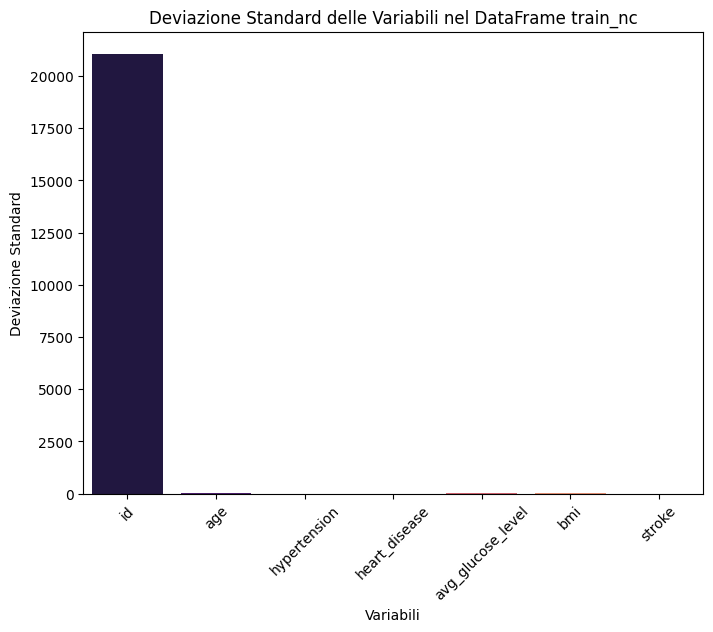

In [8]:
dev_std = train_nc.std()
plt.figure(figsize=(8, 6))
sns.barplot(x=dev_std.index, y=dev_std.values, palette= "magma")
dev_std = train_nc.std(numeric_only=True)
plt.title("Deviazione Standard delle Variabili nel DataFrame train_nc")
plt.xlabel('Variabili')
plt.ylabel('Deviazione Standard')
plt.xticks(rotation=45)
plt.show()

#### GRAFICI RELAZIONALI TRA LIVELLI DI GLUCOSIO, ETÀ E GENERE





  QUI INIZIAMO AD EFFETTUARE ALCUNE ANALISI SULLE RELAZIONI CHE POSSONO INTERCORRERE TRA LE VARIABILI CHE RITENIAMO IMPORTANTI.

Creo subito delle custom palette personalizzate che andremo ad utilizzare per i grafici, al solo fine di renderli più chiari e intutitivi.

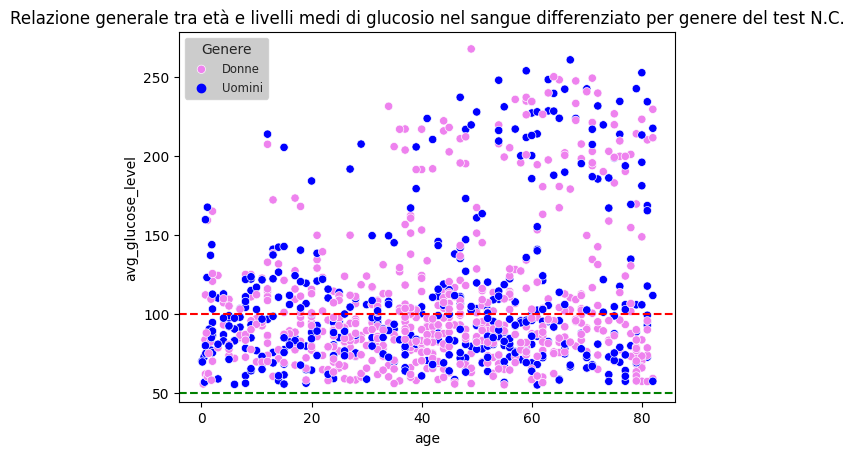

In [ ]:
sns.scatterplot(data = colonne_rel2, x="age", y="avg_glucose_level", hue = "gender", palette = custom_palette)
sns.set_style("darkgrid", {"axes.facecolor": "#C0C0C0", "grid.color": "black", "grid.linestyle": "--"})
plt.legend(title="Genere", loc="upper left", fontsize="small", labels=["Donne", "Uomini"])
plt.title("Relazione generale tra età e livelli medi di glucosio nel sangue differenziato per genere del test N.C.")
plt.axhline(y=50, color="green", linestyle="--", label="avg_glucose 100")
plt.axhline(y=100, color="red", linestyle="--", label="avg_glucose 150")
plt.show()

Da una primissima analisi incentrata sulla relazione ***tra età e livelli medi di glucosio***, si nota innanzitutto come i livelli di glucosio elevati siano maggiormente imputabili alle persone di età superiore ai 40 anni, nonostante qualche eccezione presente nel range 0-40 anni. Essendo il livello di glucosio una delle variabili più importanti quando si parla di infarti, non possiamo non tener conto dell'importanza del dato se dobbiamo effettuare un'analisi sugli attacchi cardiaci. Dallo scatterplot si nota facilmente come ci sia una concentrazione maggiore di elevati livelli di glocosio nella fascia di età compresa tra 40 e 80 anni.

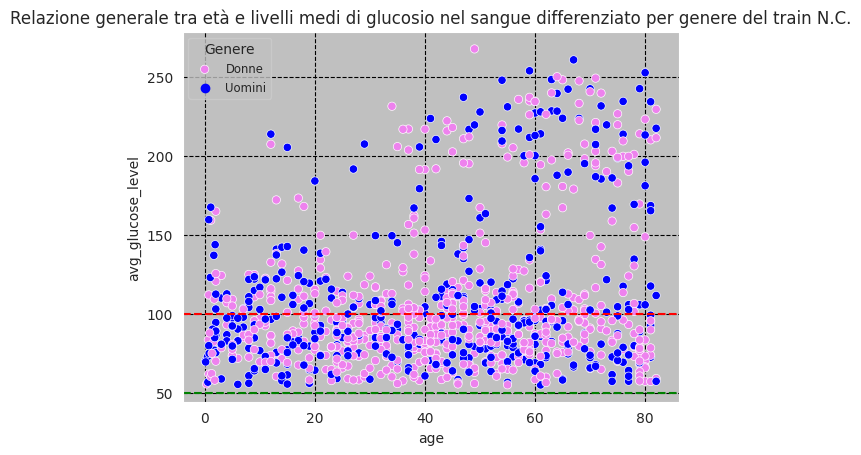

In [ ]:
sns.scatterplot(data = test_nc, x="age", y="avg_glucose_level", hue = "gender", palette = custom_palette)
sns.set_style("darkgrid", {"axes.facecolor": "#C0C0C0", "grid.color": "black", "grid.linestyle": "--"})
plt.legend(title="Genere", loc="upper left", fontsize="small", labels=["Donne", "Uomini"])
plt.title("Relazione generale tra età e livelli medi di glucosio nel sangue differenziato per genere del train N.C.")
plt.axhline(y=50, color="green", linestyle="--", label="avg_glucose 100")
plt.axhline(y=100, color="red", linestyle="--", label="avg_glucose 150")
plt.show()

Questi due primi grafici dimostrano chiaramente come non ci siano grosse differenze di distribuzione dei dati tra il train e il test.

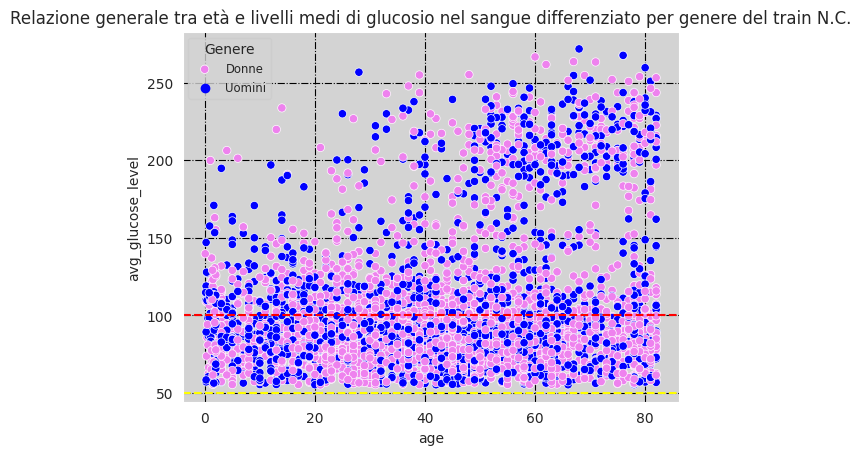

In [ ]:
sns.set_style("darkgrid", {"axes.facecolor": "#d3d3d3", "grid.color": "black", "grid.linestyle": "-."})
sns.scatterplot(data = colonne_rel1, x="age", y="avg_glucose_level", hue = "gender", palette=custom_palette)
plt.legend(title="Genere", loc="upper left", fontsize="small", labels=["Donne", "Uomini"])
plt.title("Relazione generale tra età e livelli medi di glucosio nel sangue differenziato per genere del train N.C.")
plt.axhline(y=50, color="yellow", linestyle="--", label="avg_glucose 100")
plt.axhline(y=100, color="red", linestyle="--", label="avg_glucose 150")
plt.show()

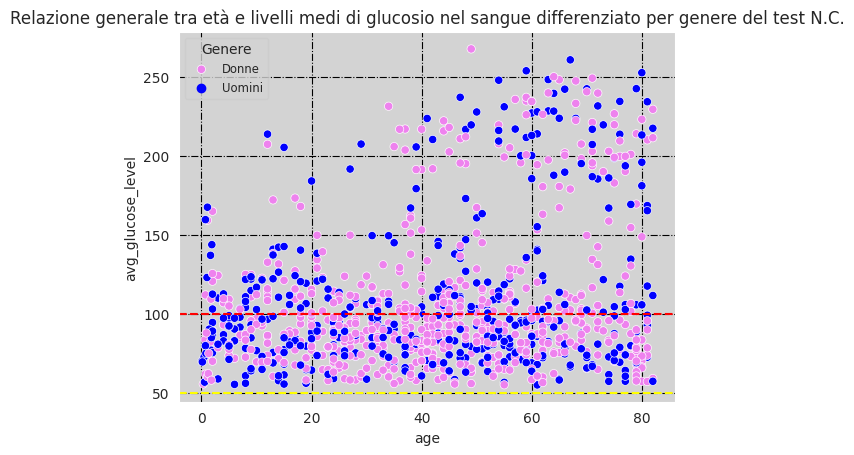

In [ ]:
sns.set_style("darkgrid", {"axes.facecolor": "#d3d3d3", "grid.color": "black", "grid.linestyle": "-."})
sns.scatterplot(data = colonne_relt, x="age", y="avg_glucose_level", hue = "gender", palette=custom_palette)
plt.legend(title="Genere", loc="upper left", fontsize="small", labels=["Donne", "Uomini"])
plt.title("Relazione generale tra età e livelli medi di glucosio nel sangue differenziato per genere del test N.C.")
plt.axhline(y=50, color="yellow", linestyle="--", label="avg_glucose 100")
plt.axhline(y=100, color="red", linestyle="--", label="avg_glucose 150")
plt.show()

Anche in questo caso la distribuzione, seppur minore, essendo meno soggetti nel test nc, non si notano particolari differenze nella distribuzione generale dei dati.

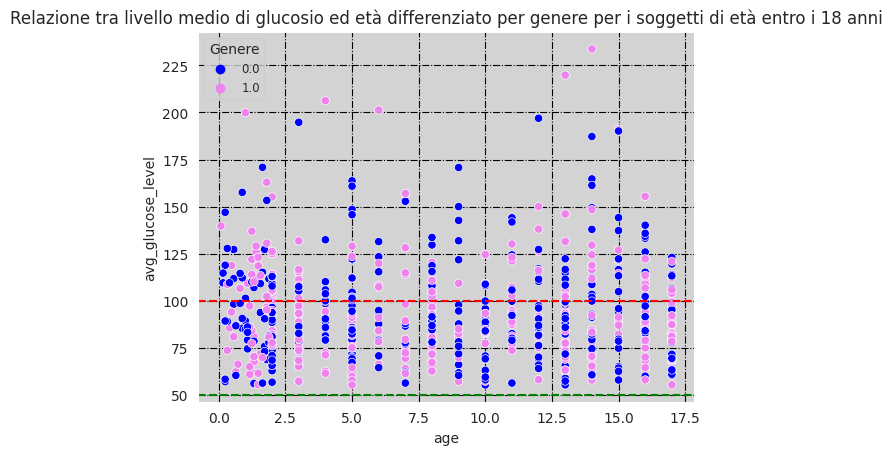

,gender,avg_glucose_level,age
count,679.00,679.00,679.00
mean,0.49,93.81,8.57
std,0.50,26.54,5.42
min,0.00,55.34,0.08
25%,0.00,76.19,3.00
50%,0.00,88.83,8.00
75%,1.00,107.90,14.00
max,1.00,233.71,17.00


In [ ]:
bambini = colonne_rel1[(colonne_rel1["age"] < 18)]
sns.scatterplot(data = bambini, x = "age", y = "avg_glucose_level", hue ="gender",palette=custom_palette)
sns.set_style("darkgrid", {"axes.facecolor": "#d3d3d3", "grid.color": "black", "grid.linestyle": "-."})
plt.legend(title="Genere", loc="upper left", fontsize="small")
plt.title("Relazione tra livello medio di glucosio ed età differenziato per genere per i soggetti di età entro i 18 anni")
plt.axhline(y=50, color='green', linestyle='--', label='avg_glucose 100')
plt.axhline(y=100, color='red', linestyle='--', label='avg_glucose 150')
plt.show()
bambini.describe()


La maggior parte dei ragazzi/bambini entro i 18 anni di età hanno una media di glucosio nel sangue molto più bassa. Sono pochi i soggetti che superano i 100 e ancor di meno quelli che superano il 150.
Nel grafico sono indicate con una linea verde e una rossa rispettivamente i livelli minimi ottimali di glucosio nel sangue e quelli massimi da non superare./ Volendo andare oltre, quei pochi valori che

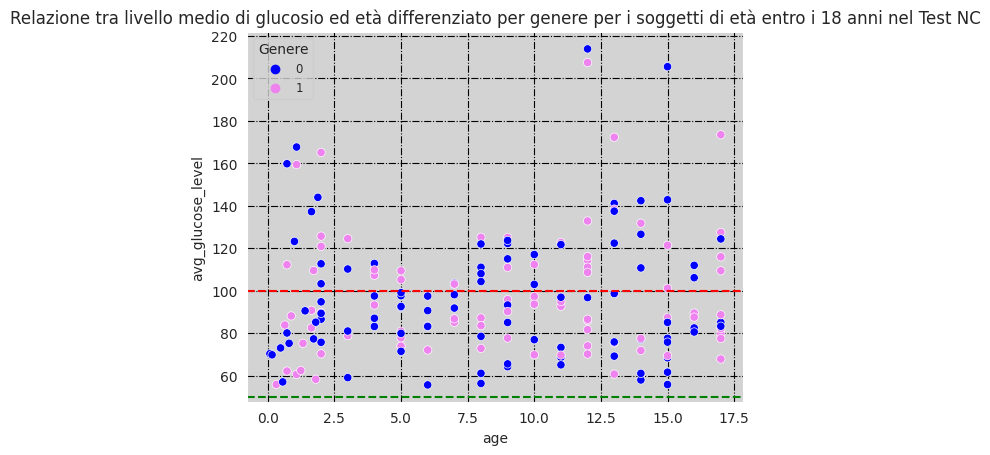

,gender,avg_glucose_level,age
count,679.00,679.00,679.00
mean,0.49,93.81,8.57
std,0.50,26.54,5.42
min,0.00,55.34,0.08
25%,0.00,76.19,3.00
50%,0.00,88.83,8.00
75%,1.00,107.90,14.00
max,1.00,233.71,17.00


In [ ]:
bambinitest = test_nc[(test_nc["age"] < 18)]
sns.scatterplot(data = bambinitest, x = "age", y = "avg_glucose_level", hue ="gender",palette=custom_palette)
sns.set_style("darkgrid", {"axes.facecolor": "#d3d3d3", "grid.color": "black", "grid.linestyle": "-."})
plt.legend(title="Genere", loc="upper left", fontsize="small")
plt.title("Relazione tra livello medio di glucosio ed età differenziato per genere per i soggetti di età entro i 18 anni nel Test NC")
plt.axhline(y=50, color='green', linestyle='--', label='avg_glucose 100')
plt.axhline(y=100, color='red', linestyle='--', label='avg_glucose 150')
plt.show()
bambini.describe()

Invece nella categoria "giovani", ovvero quei soggetti compresi tra i 18 e i 35 anni di età, notiamo come i valori di glucosio siano ampiamente al di sotto della soglia del 100. La distribuzione dei valori inferiori al 100 è molto più uniforme, tenendo anche conto del numero maggiore di soggetti che rientrano in questa categoria in confronto ai bambini <18 anni

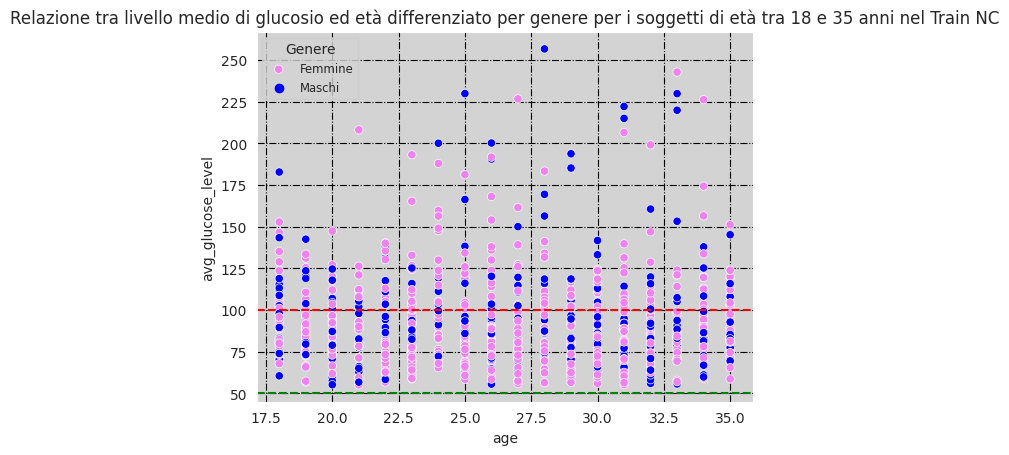

,gender,avg_glucose_level,age
count,838.00,839.00,839.00
mean,0.65,93.79,26.84
std,0.48,29.44,5.22
min,0.00,55.12,18.00
25%,0.00,74.45,23.00
50%,1.00,87.25,27.00
75%,1.00,104.59,31.00
max,1.00,256.74,35.00


In [ ]:
giovani = colonne_rel1[(colonne_rel1["age"] >= 18) & (colonne_rel1["age"] <= 35)]
sns.scatterplot(data = giovani, x ="age", y = "avg_glucose_level", hue = "gender", palette=custom_palette)
plt.legend(title="Genere", loc="upper left", fontsize="small", labels=["Femmine", "Maschi"])
plt.title("Relazione tra livello medio di glucosio ed età differenziato per genere per i soggetti di età tra 18 e 35 anni nel Train NC")
sns.set_style("darkgrid", {"axes.facecolor": "#d3d3d3", "grid.color": "black", "grid.linestyle": "-."})
plt.axhline(y=50, color='green', linestyle='--', label='avg_glucose 100')
plt.axhline(y=100, color='red', linestyle='--', label='avg_glucose 150')
plt.show()
giovani.describe()

Dal grafico possiamo notare che la distribuzione dei alori di livello di glucosio in funzione dell'età tra i 18 e i 35 anni superano leggermenre la soglia critica di 100.

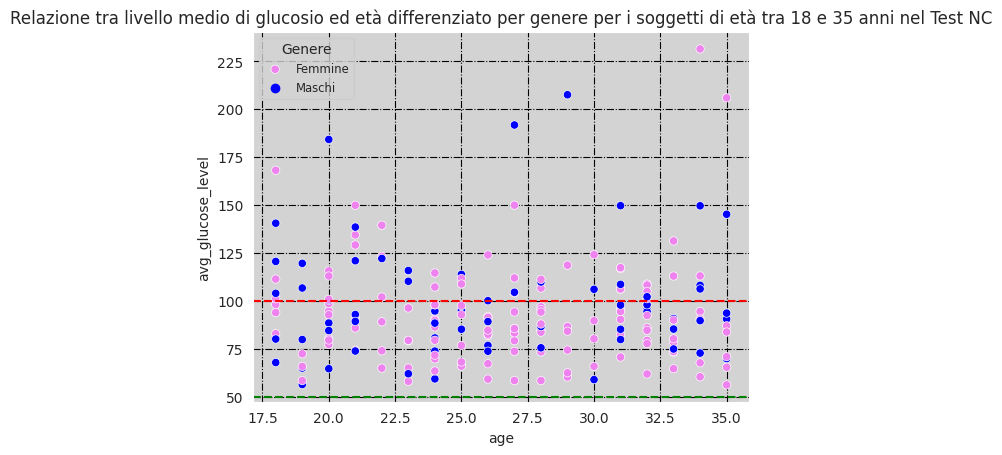

,id,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,204.00,204.00,204.00,204.00,204.00,204.00,197.00,204.00
mean,36173.79,0.66,26.59,0.02,0.00,94.41,28.34,0.00
std,21671.37,0.48,5.11,0.16,0.07,27.34,6.52,0.00
min,163.00,0.00,18.00,0.00,0.00,56.12,18.60,0.00
25%,18680.75,0.00,22.00,0.00,0.00,77.58,23.50,0.00
50%,36067.50,1.00,27.00,0.00,0.00,90.36,27.20,0.00
75%,55080.00,1.00,31.00,0.00,0.00,106.06,31.30,0.00
max,72514.00,1.00,35.00,1.00,1.00,231.50,49.90,0.00


In [ ]:
giovanitest = test_nc[(test_nc["age"] >= 18) & (test_nc["age"] <= 35)]
sns.scatterplot(data = giovanitest, x ="age", y = "avg_glucose_level", hue = "gender", palette=custom_palette)
plt.legend(title="Genere", loc="upper left", fontsize="small", labels=["Femmine", "Maschi"])
plt.title("Relazione tra livello medio di glucosio ed età differenziato per genere per i soggetti di età tra 18 e 35 anni nel Test NC")
sns.set_style("darkgrid", {"axes.facecolor": "#d3d3d3", "grid.color": "black", "grid.linestyle": "-."})
plt.axhline(y=50, color='green', linestyle='--', label='avg_glucose 100')
plt.axhline(y=100, color='red', linestyle='--', label='avg_glucose 150')
plt.show()
giovanitest.describe()

In questo caso notiamo che nel dataset test, i valori distribuiti al di sopra della soglia consigliata di livelli di glucosio sono decisamente inferiori. Probabilmente questo risultato potrebbe essere il risultato dal fatto che nel test nc sono presenti meno soggetti.

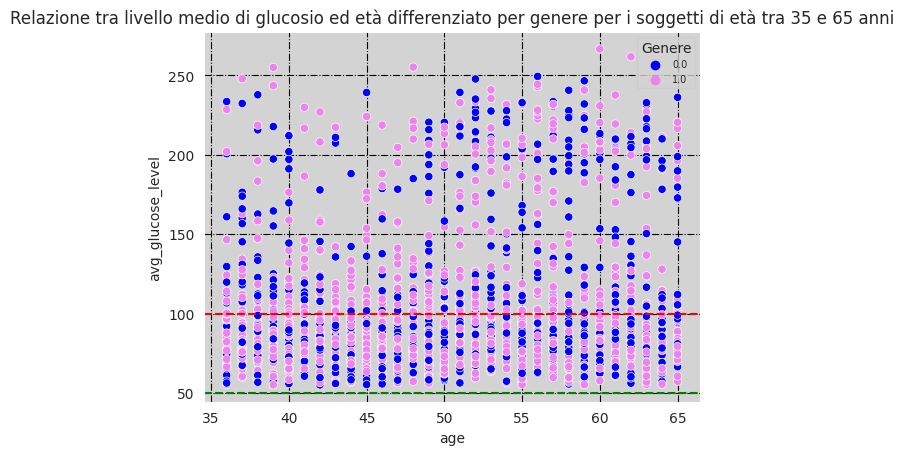

,gender,avg_glucose_level,age
count,1787.00,1787.00,1787.00
mean,0.58,107.98,50.64
std,0.49,46.41,8.33
min,0.00,55.22,36.00
25%,0.00,77.51,44.00
50%,1.00,92.39,51.00
75%,1.00,115.98,57.00
max,1.00,266.59,65.00


In [ ]:
adulti = colonne_rel1[(colonne_rel1["age"] > 35) & (colonne_rel1["age"] <= 65)]
#print(adulti)
sns.scatterplot(data = adulti, x ="age", y = "avg_glucose_level", hue = "gender", palette=custom_palette)
plt.legend(title="Genere", loc="upper right", fontsize="x-small")
plt.title("Relazione tra livello medio di glucosio ed età differenziato per genere per i soggetti di età tra 35 e 65 anni")
sns.set_style("darkgrid", {"axes.facecolor": "#C0C0C0", "grid.color": "black", "grid.linestyle": "--"})
plt.axhline(y=50, color='green', linestyle='--', label='avg_glucose 100')
plt.axhline(y=100, color='red', linestyle='--', label='avg_glucose 150')
plt.show()
adulti.describe()

Per quanto riguarda gli adulti il discorso varia leggermente. Notiamo infatti un aumentare dei soggetti con valori di glucosio superiori a 100/150, con una media che si attesta a 107.89, il che comporta un aumento del rischio di infarto. Ricordiamo sempre che la soglia massima ottimale per i livelli di glucosio nel sangue non dovrebbe superare i 100. Infatti i giovani compresi tra i 18 e 35 anni hanno una media glucosio di 93.79 che rientra perfettamente nel range ideale.

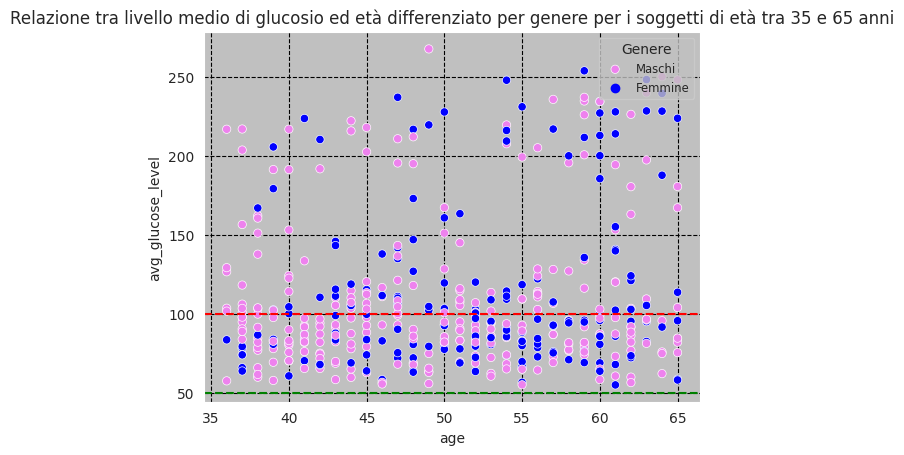

,gender,avg_glucose_level,age
count,1787.00,1787.00,1787.00
mean,0.58,107.98,50.64
std,0.49,46.41,8.33
min,0.00,55.22,36.00
25%,0.00,77.51,44.00
50%,1.00,92.39,51.00
75%,1.00,115.98,57.00
max,1.00,266.59,65.00


In [ ]:
adultitest = test_nc[(test_nc["age"] > 35) & (test_nc["age"] <= 65)]
#print(adulti)
sns.scatterplot(data = adultitest, x ="age", y = "avg_glucose_level", hue = "gender", palette=custom_palette)
plt.legend(title="Genere", loc="upper right", fontsize="small", labels=["Maschi", "Femmine"])
plt.title("Relazione tra livello medio di glucosio ed età differenziato per genere per i soggetti di età tra 35 e 65 anni")
sns.set_style("darkgrid", {"axes.facecolor": "#C0C0C0", "grid.color": "black", "grid.linestyle": "--"})
plt.axhline(y=50, color='green', linestyle='--', label='avg_glucose 100')
plt.axhline(y=100, color='red', linestyle='--', label='avg_glucose 150')
plt.show()
adulti.describe()

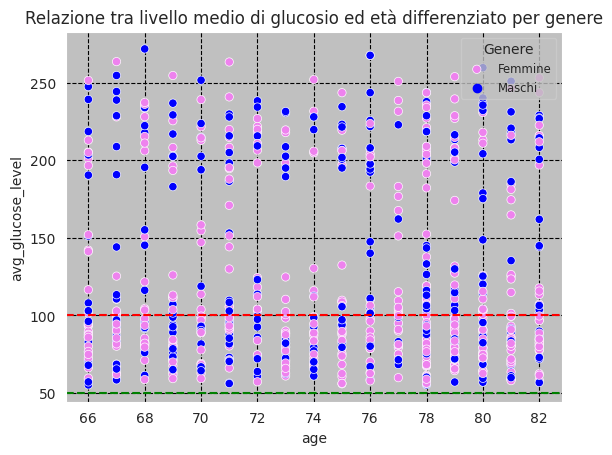

,gender,avg_glucose_level,age
count,774.00,774.00,774.00
mean,0.59,123.59,74.65
std,0.49,59.66,5.00
min,0.00,55.23,66.00
25%,0.00,79.87,70.00
50%,1.00,97.65,75.00
75%,1.00,183.28,79.00
max,1.00,271.74,82.00


In [ ]:
anziani = colonne_rel1[(colonne_rel1["age"] > 65)]
sns.scatterplot(data = anziani, x ="age", y = "avg_glucose_level", hue = "gender", palette=custom_palette)
plt.axhline(y=50, color='green', linestyle='--', label='avg_glucose 50')
plt.axhline(y=100, color='red', linestyle='--', label='avg_glucose 100')
plt.title("Relazione tra livello medio di glucosio ed età differenziato per genere")
plt.legend(title="Genere", loc="upper right", fontsize="small", labels=["Femmine", "Maschi"])
sns.set_style("darkgrid", {"axes.facecolor": "#C0C0C0", "grid.color": "black", "grid.linestyle": "--"})
plt.show()
anziani.describe()

Per conludere la prima analisi di rapporto età e livello di glucosio, non ci resta che esaminare i soggetti "anziani", nella fascia di età che va oltre i 65 anni di età. In questo caso, dallo scatterplot notiamo che la distribuzione dei soggetti è molto più omogenea e uniforme tra quelli al di sotto dei 100/150 e quelli al di sopra, esposti quindi al rischio di malattie cardiache.

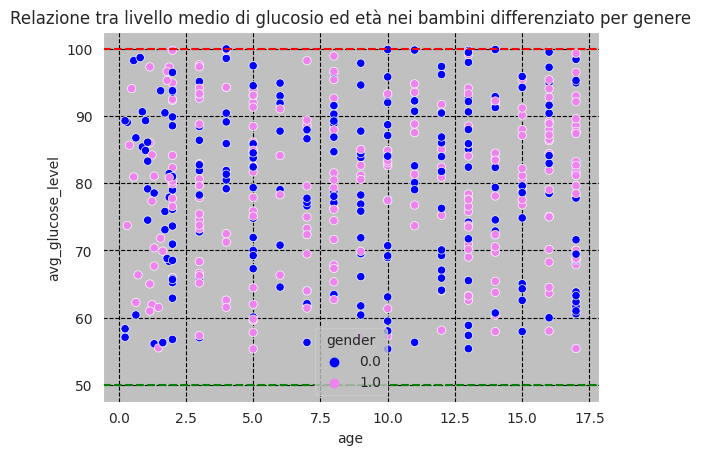

,gender,avg_glucose_level,age
count,456.00,456.00,456.00
mean,0.51,79.37,8.74
std,0.50,12.04,5.34
min,0.00,55.34,0.24
25%,0.00,69.80,4.00
50%,1.00,80.53,9.00
75%,1.00,89.06,13.00
max,1.00,99.96,17.00


In [ ]:
bambini_basso_glc = colonne_rel1[(colonne_rel1["age"] < 18) & (colonne_rel1["avg_glucose_level"] < 100)]
#bambini_basso_glc.describe()
sns.scatterplot(data = bambini_basso_glc, x ="age", y = "avg_glucose_level", hue = "gender", palette=custom_palette)
plt.title("Relazione tra livello medio di glucosio ed età nei bambini differenziato per genere")
plt.axhline(y=50, color='green', linestyle='--', label='avg_glucose 50')
plt.axhline(y=100, color='red', linestyle='--', label='avg_glucose 100')
plt.show()
bambini_basso_glc.describe()

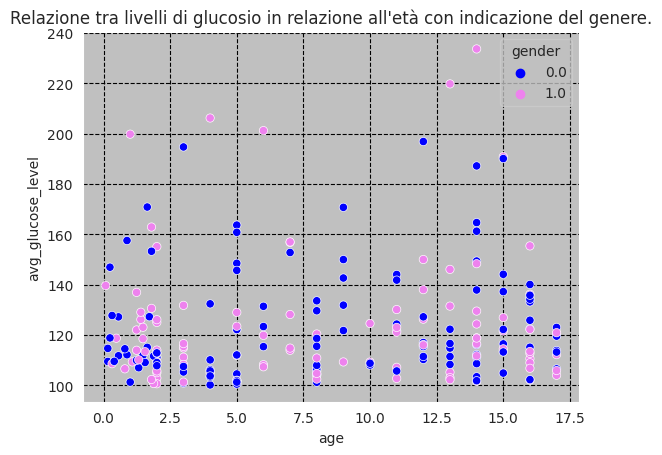

gender               223
avg_glucose_level    223
age                  223
dtype: int64
       gender  avg_glucose_level    age
count  223.00             223.00 223.00
mean     0.47             123.32   8.22
std      0.50              23.48   5.57
min      0.00             100.19   0.08
25%      0.00             108.28   3.00
50%      0.00             115.40   8.00
75%      1.00             129.59  14.00
max      1.00             233.71  17.00


In [ ]:
bambini_alto_glc = colonne_rel1[(colonne_rel1["age"] < 18) & (colonne_rel1["avg_glucose_level"] > 100)]
plt.title("Relazione tra livelli di glucosio in relazione all'età con indicazione del genere.")
sns.scatterplot(data = bambini_alto_glc, x ="age", y = "avg_glucose_level", hue = "gender",palette=custom_palette)
plt
plt.show()
print(bambini_alto_glc.count())
print(bambini_alto_glc.describe())

In questo grafico possiamo osservare la distribuzione dei soggetti con età inferiore a 18 anni che hanno un tasso di glucosio nel sangue superiore ai livelli massimi consigliati di 100.

#### GRAFICI RELAZIONALI TRA BMI, ETÀ E INDICAZIONE DI IPERTENSIONE O STROKE

Prima di procedere a presentare questo tipo di relazione, devo necessariamente avvisare il lettore che il dato di BMI non è un dato su cui fare particolarmente affidamento, dato che è una variabile non "pura". Ciò significa che un alto livello di BMI non necessariamente implica una persona obesa o in sovrappeso. Una persona con una massa muscolare (magra) importante, dai livelli di BMI potrebbe risultare obesa, quindi queste analisi sui BMI vanno prese con molta attenzione.

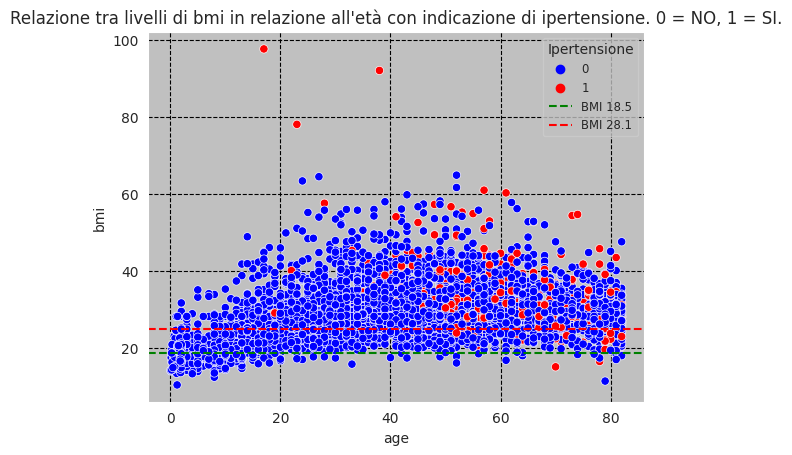

In [ ]:
colonne_rel3 = train_nc[["bmi", "avg_glucose_level", "age", "hypertension", "stroke"]]
sns.scatterplot(data=colonne_rel3, x="age", y="bmi", hue="hypertension", palette=custom_palette2)
plt.title("Relazione tra livelli di bmi in relazione all'età con indicazione di ipertensione. 0 = NO, 1 = SI.")
sns.set_style("darkgrid", {"axes.facecolor": "#C0C0C0", "grid.color": "black", "grid.linestyle": "--"})
plt.axhline(y=18.5, color='green', linestyle='--', label='BMI 18.5')
plt.axhline(y=24.9, color='red', linestyle='--', label='BMI 28.1')
plt.legend(title="Ipertensione", loc="upper right", fontsize="small")
plt.show()


Come possiamo osservare da questo grafico, che mette in relazione i livelli di BMI con l'età e l'ipertensione, vediamo che la maggior parte dei soggetti che soffre di ipertensione è distribuita in età superiore ai 40 anni e con indici di bmi che superano il livello della mediana di BMI che si attesta a 28.1.

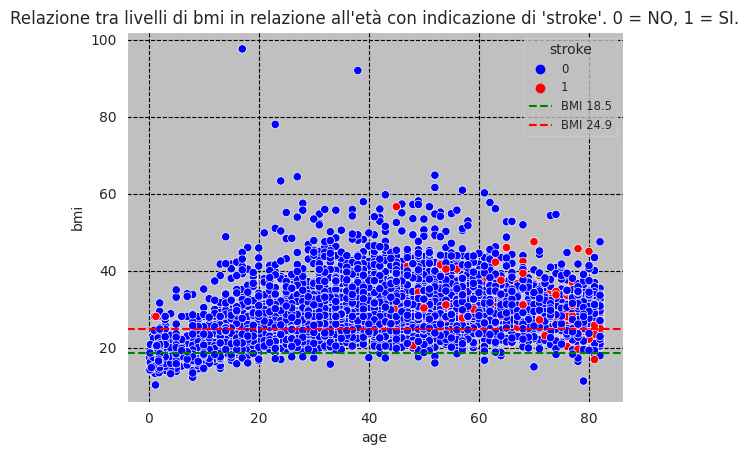

In [ ]:
colonne_rel3 = train_nc[["bmi", "avg_glucose_level", "age", "hypertension", "stroke"]]
sns.scatterplot(data=colonne_rel3, x="age", y="bmi", hue="stroke", palette=custom_palette2)
plt.title("Relazione tra livelli di bmi in relazione all'età con indicazione di 'stroke'. 0 = NO, 1 = SI.")
sns.set_style("darkgrid", {"axes.facecolor": "#C0C0C0", "grid.color": "black", "grid.linestyle": "--"})
plt.axhline(y=18.5, color='green', linestyle='--', label='BMI 18.5')
plt.axhline(y=24.9, color='red', linestyle='--', label='BMI 24.9')
plt.legend(title="stroke", loc="upper right", fontsize="small")
plt.show()


In questo grafico si mettono in relazione i livelli di BMI con l'età e l'indicazione se hanno avuto o meno un attacco di 'stroke'. Anche in questo caso possiamo notare che la maggior parte dei soggetti colpiti da 'stroke' rientrano nella fascia d'età superiore ai 40 anni e con livelli di BMI superiori alla mediana, che ricordiamo attestarsi sul 28.1.

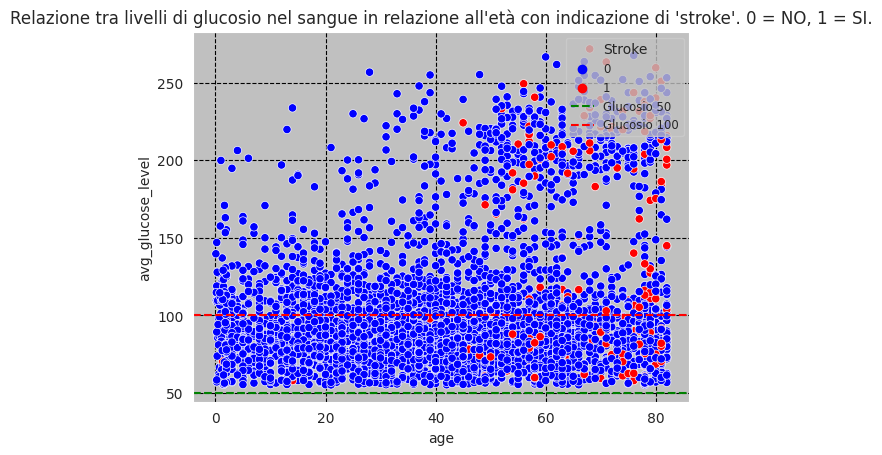

In [ ]:
colonne_rel3 = train_nc[["bmi", "avg_glucose_level", "age", "hypertension", "stroke"]]
sns.scatterplot(data=colonne_rel3, x="age", y="avg_glucose_level", hue="stroke", palette=custom_palette2)
plt.title("Relazione tra livelli di glucosio nel sangue in relazione all'età con indicazione di 'stroke'. 0 = NO, 1 = SI.")
sns.set_style("darkgrid", {"axes.facecolor": "#C0C0C0", "grid.color": "black", "grid.linestyle": "--"})
plt.axhline(y=50, color='green', linestyle='--', label="Glucosio 50")
plt.axhline(y=100, color='red', linestyle='--', label="Glucosio 100")
plt.legend(title="Stroke", loc="upper right", fontsize="small")
plt.show()


Da questo grafico relazionale possiamo concludere che, ovviamente, gli attacchi cardiaci sono distribuiti maggiormente in fascia d'età che supera i 40/45 anni. Tuttavia, la distribuzione degli infarti mi lascia pensare che forse il livello di glucosio nel sangue, in questo caso, non è un fattore particolarmente discriminante, dato che i puntini rossi dello stroke sono abbastanza omogenei tra i valori alti di glucosio e quelli relativamente più bassi. Quindi mi sentirei di affermare che non necessariamente c'è una correlazione tra livelli medi di glucosio e 'stroke'.

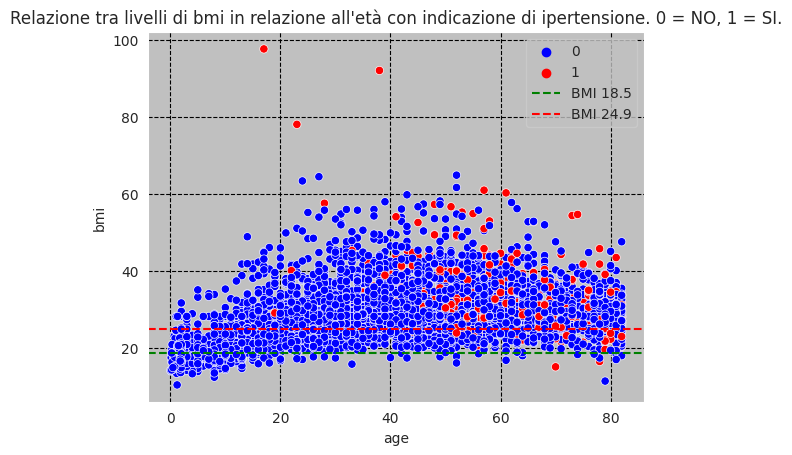

In [ ]:
colonne_rel3 = train_nc[["bmi", "avg_glucose_level", "age", "hypertension", "stroke"]]
sns.scatterplot(data=colonne_rel3, x="age", y="bmi", hue="hypertension", palette=custom_palette2)
plt.title("Relazione tra livelli di bmi in relazione all'età con indicazione di ipertensione. 0 = NO, 1 = SI.")
sns.set_style("darkgrid", {"axes.facecolor": "#C0C0C0", "grid.color": "black", "grid.linestyle": "--"})
plt.axhline(y=18.5, color='green', linestyle='--', label='BMI 18.5')
plt.axhline(y=24.9, color='red', linestyle='--', label='BMI 24.9')
plt.legend()
plt.show()

Da questo scatterplot possiamo notare che la maggior parte dei soggetti presenti nel dataset train NC non soffrono di ipertensione, e quei soggetti invece che ne soffrono sono maggiormente concentrati nella fascia d'età superiore ai 40 anni.\
Tendenzialmente per gli adulti un buon valore BMI è tra 18,5 e 24,9. quindi possiamo facilmente capire, grazie alle due rette che indicano il range ottimale di BMI, che ci sono moltissimi soggetti al di sopra della soglia ottimale di BMI, soprttutto dai 20 anni in poi.

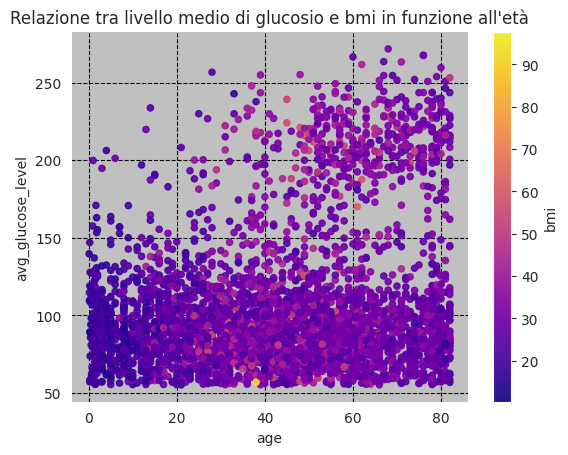

In [ ]:
colonne_rel3.plot(kind='scatter', x='age', y='avg_glucose_level', c = "bmi", s=20, alpha=0.9, cmap= "plasma")
plt.title("Relazione tra livello medio di glucosio e bmi in funzione all'età")
sns.set_style("darkgrid", {"axes.facecolor": "#C0C0C0", "grid.color": "black", "grid.linestyle": "-."})
plt.gca().spines[['top', 'right',]].set_visible(False)

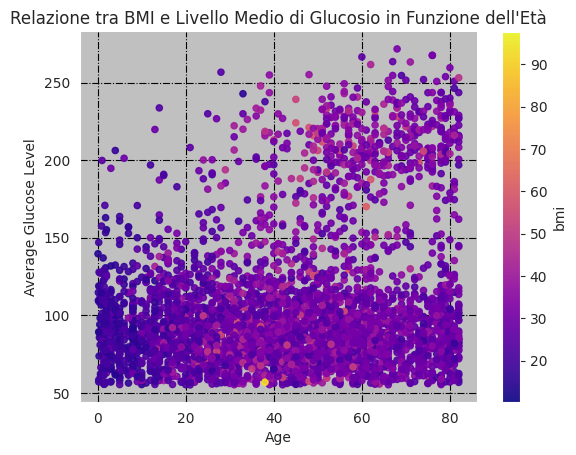

In [ ]:
colonne_rel3.plot(kind='scatter', x='age', y='avg_glucose_level', c="bmi", s=20, alpha=0.9, cmap = "plasma")
plt.gca().spines[['top', 'right']].set_visible(False)
plt.xlabel('Age')
plt.ylabel('Average Glucose Level')
plt.title("Relazione tra BMI e Livello Medio di Glucosio in Funzione dell'Età")
sns.set_style("darkgrid", {"axes.facecolor": "#C0C0C0", "grid.color": "black", "grid.linestyle": "--"})
plt.show()


Dall'analisi di questi grafici si possono iniziare a tirare le prime somme, affermando che all'aumentare dell'età aumentano sia i valori medi di glucosio nel sangue, sia le possibilità di ipertensione.\
Un fattore che non viene particolarmente influenzato dall'età è il valore BMI che ha una distribuzione abbastanza omogenea su tutto il set, escludendo ovviamente giovani e giovanissimi che rientrano entro i 18 anni di età.

A questo punto non ci resta che valutare la relazione tra bmi, età, ipertensione e stroke.

In [ ]:
colonne_rel5 = train_nc[["hypertension", "stroke"]]
colonne_rel5

,hypertension,stroke
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
4074,0,0
4075,0,0
4076,0,0
4077,0,1


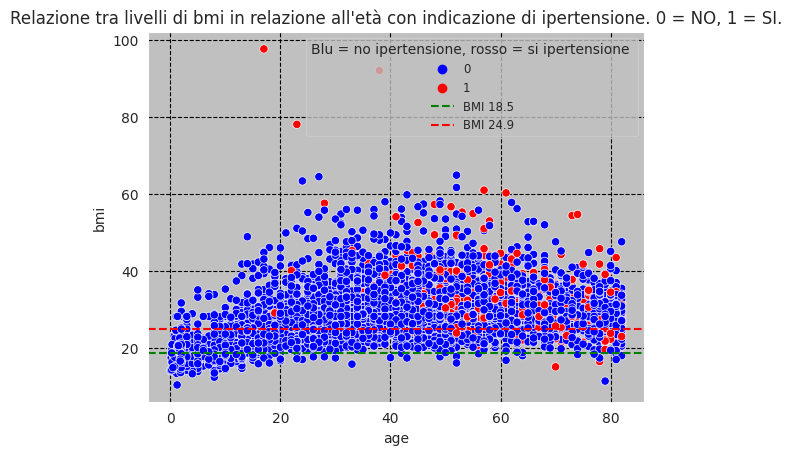

In [ ]:
colonne_rel5 = train_nc[["gender", "bmi", "age", "hypertension", "stroke"]]
sns.scatterplot(data=colonne_rel3, x="age", y="bmi", hue="hypertension", palette=custom_palette2)
plt.title("Relazione tra livelli di bmi in relazione all'età con indicazione di ipertensione. 0 = NO, 1 = SI.")
sns.set_style("darkgrid", {"axes.facecolor": "#C0C0C0", "grid.color": "black", "grid.linestyle": "--"})
plt.axhline(y=18.5, color='green', linestyle='--', label='BMI 18.5')
plt.axhline(y=24.9, color='red', linestyle='--', label='BMI 24.9')
plt.legend(title="Blu = no ipertensione, rosso = si ipertensione ", loc="upper right", fontsize="small")
plt.show()


Da quest'ultimo grafico notiamo subito l'altissima deviazione che presenta il valore di glucosio, superando i 40 punti.

*   Ciò vuol dire che c'è una forte eterogeneità nei dati del valore del glucosio.
*  La deviazione standard dell'indice di massa corporea è decisamente inferiore, attestandosi al di sotto dei 10 punti. significando che i soggetti presenti nel dataset hanno un'indice di massa corporea abbastanza omogeneo.

# FASE 3

### PREPARAZIONE DATASET PER ML

Carichiamo i dataset convertiti per la creazione dei modelli di ML.

In [ ]:
train_c = pd.read_csv("sample_data/2.train_convertito.csv", sep = ",") #non mi trova il file, non voglio toccare niente ma riesci a fare una prova anche tu?
test_c = pd.read_csv("sample_data/2.test_convertito.csv", sep = ",")      #ricordati che questi sono i file convertiti. Quindi devi caricare da sampledata i file convertiti
print("La descrizione del train convertito è: ", train_c.describe())
print("La descrizione del test convertito è: ", test_c.describe())

La descrizione del train convertito è:              id  gender     age  hypertension  heart_disease  ever_married  \
count  4079.00 4079.00 4079.00       4079.00        4079.00       4079.00   
mean  36609.62    0.58   43.30          0.10           0.05          0.66   
std   21076.16    0.49   22.63          0.30           0.23          0.47   
min      67.00    0.00    0.08          0.00           0.00          0.00   
25%   17950.50    0.00   25.00          0.00           0.00          0.00   
50%   37192.00    1.00   45.00          0.00           0.00          1.00   
75%   54511.50    1.00   61.00          0.00           0.00          1.00   
max   72940.00    2.00   82.00          1.00           1.00          1.00   

       work_type  Residence_type  avg_glucose_level     bmi  smoking_status  \
count    4079.00         4079.00            4079.00 3927.00         4079.00   
mean        0.83            0.51             105.66   28.96            1.10   
std         1.11            0

Dopo aver caricato i dataset convertiti dobbiamo verificare se ci siano valori nulli.

In [ ]:
print(train_c.isnull().sum())
print(test_c.isnull().sum())

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  152
smoking_status         0
stroke                 0
dtype: int64
id                    0
gender                0
age                   0
hypertension          0
heart_disease         0
ever_married          0
work_type             0
Residence_type        0
avg_glucose_level     0
bmi                  49
smoking_status        0
stroke                0
dtype: int64


Dalla descrizione dei due dataset vediamo che ci sono 152 valori nulli del BMI nel train e 49 valori nulli, sempre di BMI, nel dataset di test.
Dobbiamo quindi procedere alla sostituzione dei valori mancanti. Per effettuare la sostituzione, vediamo qual è la mediana e utilizzeremo la mediana in sostituzione. Ripeto che utilizziamo la mediana perché è un valore più affidabile della media, escludendo eventuali outlier.

### CREAZIONE DEI MODELLI DI ML

A questo punto dobbiamo preparare i dataset per il lavoro della fase 3, ovvero la parte di ML.
Andiamo quindi a sostituire i valori nulli che troviamo nei dataset.

In [ ]:
train_c.fillna(train_c.median(), inplace = True)
test_c.fillna(test_c.median(), inplace = True)


In [ ]:
print(train_c.isnull().sum())
print(test_c.isnull().sum())

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64
id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


In [ ]:
print(train_c.info())
print(test_c.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4079 entries, 0 to 4078
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4079 non-null   int64  
 1   gender             4079 non-null   int64  
 2   age                4079 non-null   float64
 3   hypertension       4079 non-null   int64  
 4   heart_disease      4079 non-null   int64  
 5   ever_married       4079 non-null   int64  
 6   work_type          4079 non-null   int64  
 7   Residence_type     4079 non-null   int64  
 8   avg_glucose_level  4079 non-null   float64
 9   bmi                4079 non-null   float64
 10  smoking_status     4079 non-null   int64  
 11  stroke             4079 non-null   int64  
dtypes: float64(3), int64(9)
memory usage: 382.5 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1031 entries, 0 to 1030
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ----

A questo punto i nostri dataset per il ML sono completi di tutti i valori, non abbiamo più nessun valore nullo.
Siamo quindi pronti a lavorare sulla parte del ML.

Ora dobbiamo procedere a rimuovere la colonna di "stroke" per preparare l'ambiente al ML.

In [ ]:
X_train = train_c.drop("stroke", axis=1)
Y_train = train_c["stroke"]

In [ ]:
X_test = test_c.drop("stroke", axis=1)
Y_test = test_c["stroke"]

Abbiamo dunque preparato le variabili per procedere con le tecniche di ML.
X train è il dataset completo di tutte le variabili, escluso stroke.
Y train invece è il dataframe che contiene ancora tutte le etichette, perché ci servirà per effettuare la previsione.


In [ ]:
X_train.describe()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
count,4079.00,4079.00,4079.00,4079.00,4079.00,4079.00,4079.00,4079.00,4079.00,4079.00,4079.00
mean,36609.62,0.58,43.30,0.10,0.05,0.66,0.83,0.51,105.66,28.93,1.10
std,21076.16,0.49,22.63,0.30,0.23,0.47,1.11,0.50,45.04,7.72,1.07
min,67.00,0.00,0.08,0.00,0.00,0.00,0.00,0.00,55.12,10.30,0.00
25%,17950.50,0.00,25.00,0.00,0.00,0.00,0.00,0.00,76.88,23.90,0.00
50%,37192.00,1.00,45.00,0.00,0.00,1.00,0.00,1.00,91.53,28.10,1.00
75%,54511.50,1.00,61.00,0.00,0.00,1.00,2.00,1.00,113.65,32.90,2.00
max,72940.00,2.00,82.00,1.00,1.00,1.00,4.00,1.00,271.74,97.60,3.00


### RISULTATI DEI MODELLI DI ML

In [ ]:
modello_svm = svm.SVC(kernel='linear', C=1, random_state=0)
modello_svm.fit(X_train, Y_train)

SVC(C=1, kernel='linear', random_state=0)

Questo modello impiega circa 3 minuti per elaborare i dataframe.


In [ ]:
Y_pred = modello_svm.predict(X_test)
print(list(Y_pred))


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [ ]:

print(Y_test)

0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
30      0
31      0
32      0
33      0
34      0
35      1
36      0
37      0
38      0
39      0
40      0
41      0
42      0
43      0
44      0
45      0
46      0
47      0
48      0
49      0
50      0
51      0
52      0
53      0
54      1
55      0
56      0
57      0
58      0
59      0
60      0
61      0
62      1
63      0
64      0
65      0
66      0
67      0
68      0
69      0
70      0
71      0
72      0
73      0
74      0
75      0
76      0
77      1
78      0
79      0
80      0
81      0
82      0
83      0
84      0
85      0
86      0
87      0
88      0
89      0
90      0
91      1
92      0
93      0
94      0
95      0
96      0
97      0
98      0
99      0


In [ ]:
accuracy_score(Y_test, Y_pred)

0.9359844810863239

In [ ]:
confusion_matrix(Y_test, Y_pred, labels=[0,1])

array([[962,   9],
       [ 57,   3]])

Quindi abbiamo:

1.   962 Veri negativi (True Negative TN)
2.   9 Falsi positivi (False Positive FP)
3.   57 Falsi negativi (False Negative FN)
4.   3 Veri positivi (True Positive TP)



In [ ]:
report = classification_report(Y_test, Y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.94      0.99      0.97       971
           1       0.25      0.05      0.08        60

    accuracy                           0.94      1031
   macro avg       0.60      0.52      0.53      1031
weighted avg       0.90      0.94      0.92      1031



# CONCLUSIONI E REPORT FINALE

QUI INSERIREMO IL REPORT FINALE DELL'ANALISI. UN BEL TESTO CORREDATO DA DATI E QUANT'ALTRO
